In [13]:
import pandas as pd
import seaborn as sns

In [14]:
#import the data
df_als2=pd.read_csv('als_data.csv')
df_als2.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [15]:
# Delete all the variables that are not related to ALS based on the column name
df_als3=df_als2[['Age_mean','ALSFRS_Total_max','ALSFRS_Total_median','ALSFRS_Total_min','ALSFRS_Total_range']]
#df_als3=df_als2.filter(regex='ALS', axis=1)
df_als3.head()

,Age_mean,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range
0,65,30,28.0,22,0.021164
1,48,37,33.0,21,0.028725
2,38,24,14.0,10,0.025000
3,63,30,29.0,24,0.014963
4,63,32,27.5,20,0.020374


In [16]:
# Applying standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = StandardScaler().fit_transform(df_als3.values)
scaled_features_df_als2 = pd.DataFrame(scaled_features, index=df_als3.index, columns=df_als3.columns)
scaled_features_df_als2.head()

,Age_mean,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range
0,0.917137,-0.318520,0.134960,0.247368,-0.301588
1,-0.574879,0.998995,0.888863,0.130839,0.166537
2,-1.452535,-1.447819,-1.975969,-1.150976,-0.064100
3,0.741606,-0.318520,0.285741,0.480425,-0.685524
4,0.741606,0.057913,0.059570,0.014311,-0.350529


For n_clusters = 2 The average silhouette_score is : 0.3252456195301293
For n_clusters = 3 The average silhouette_score is : 0.29516078297360104
For n_clusters = 4 The average silhouette_score is : 0.24883051672684994
For n_clusters = 5 The average silhouette_score is : 0.26255252710997407
For n_clusters = 6 The average silhouette_score is : 0.2456132376507167


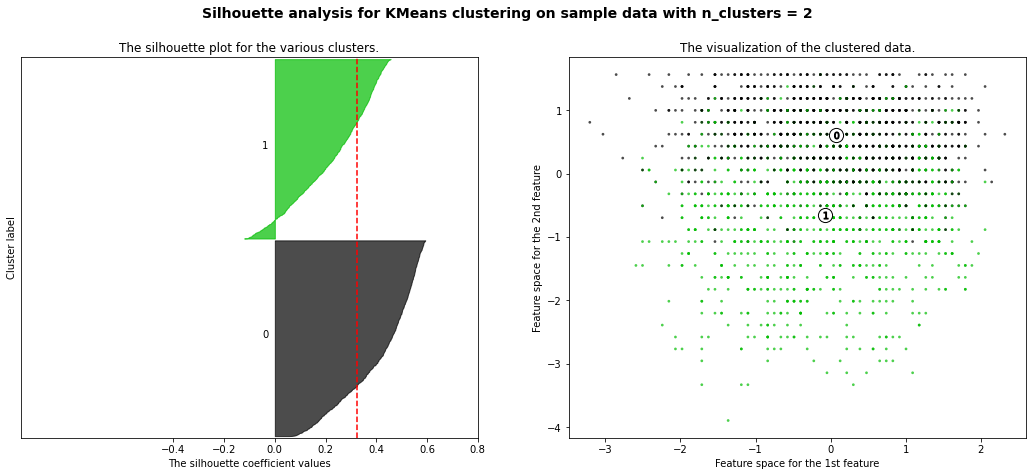

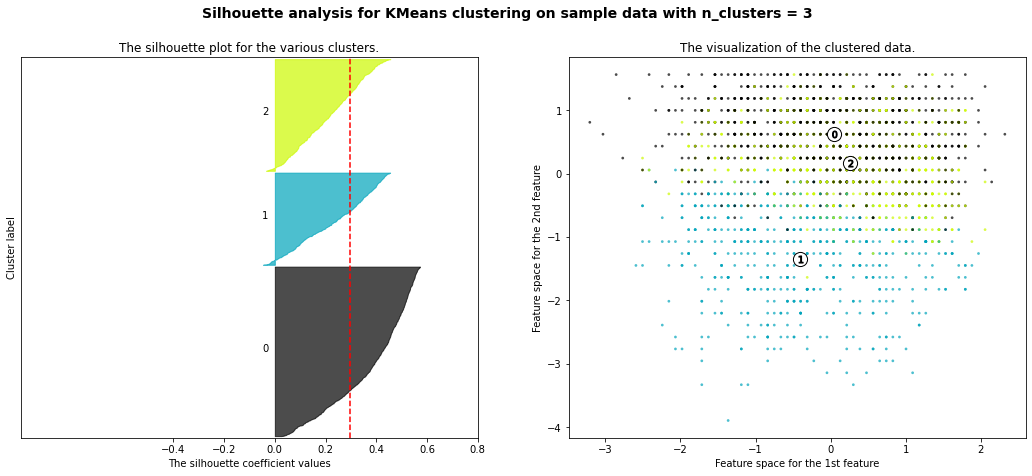

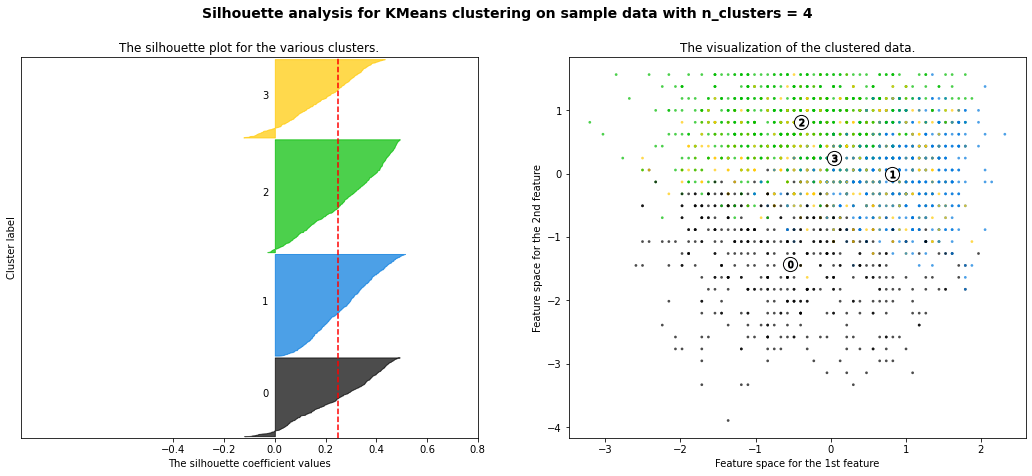

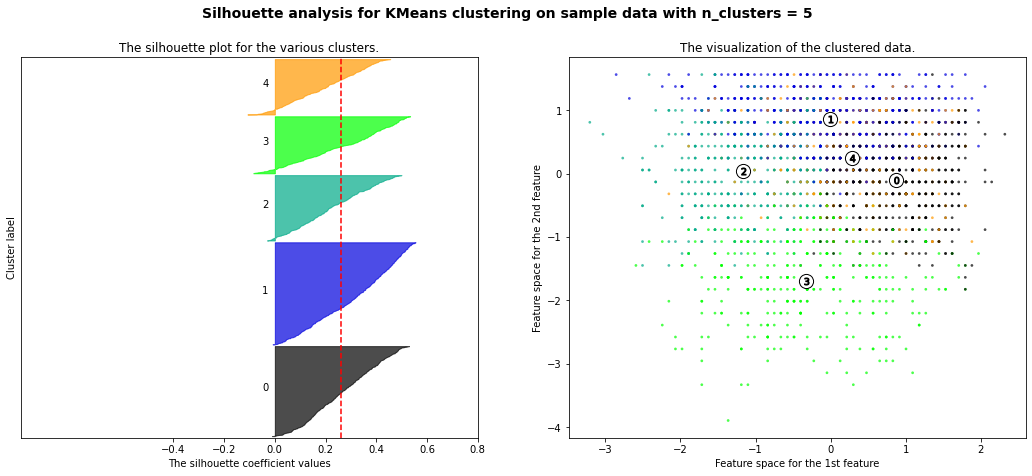

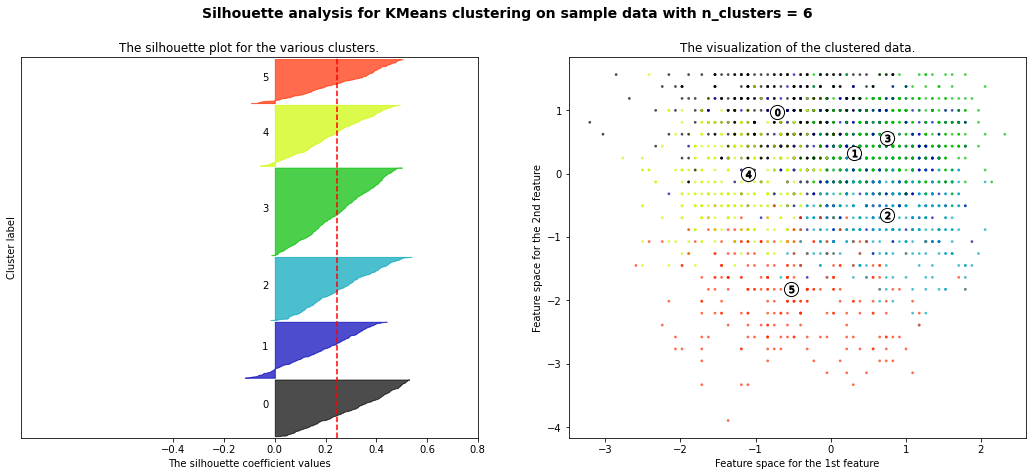

In [17]:
# Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-1, 0.4])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_features_df_als2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_features_df_als2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_features_df_als2, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_features_df_als2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.4,-0.2, 0, 0.2, 0.4,0.6,0.8])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        scaled_features_df_als2.iloc[:, 0], scaled_features_df_als2.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Based on the above plots. Cluster size=2 seems to be most appropriate than others as it stands well against all the three measuring criteria (scores below average Silhouette score, Wide fluctuations in the size of the plot, and non-uniform thickness). 

(2223, 5)
(2223,)


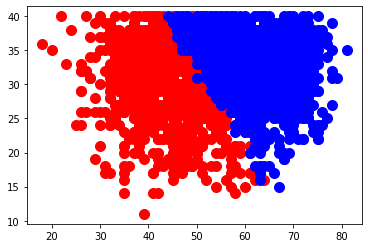

In [18]:
# Fit K-means model with clusters=2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2)
label=kmeans.fit_predict(df_als3)
print(df_als3.shape)
print(label.shape)
#Getting unique labels
u_labels = np.unique(label)
#plotting the results:
#6 Visualising the clusters
plt.scatter(df_als3.iloc[label==0, 0], df_als3.iloc[label==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(df_als3.iloc[label==1, 0], df_als3.iloc[label==1, 1], s=100, c='blue', label ='Cluster 2')

In [19]:
# PCA transformation with two features to the scaled data.

from sklearn.preprocessing import StandardScaler

# Splitting the X and Y into the
# Training set and Testing set
#from sklearn.model_selection import train_test_split 

# Separating out the features
x = df_als3.values

df_als3['target']=pd.Series(label)
y=df_als3['target']

features = ['Age_mean','ALSFRS_Total_max','ALSFRS_Total_median','ALSFRS_Total_min','ALSFRS_Total_range']
# Separating out the features
x = df_als3.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)
targets = ['label1', 'label2', 'label3','label4']

from sklearn.decomposition import PCA
pd.options.mode.chained_assignment = None

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])
principalDf.head()

finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()



,principal component 1,principal component 2,target
0,-0.205485,0.207155,1
1,-0.971144,0.330492,0
2,2.482922,-1.693660,0
3,-0.555921,-0.151826,1
4,-0.224200,0.257888,1


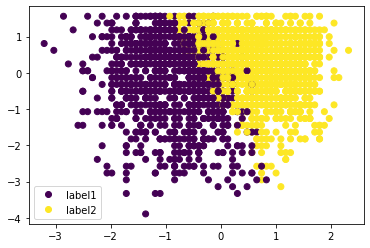

In [20]:
import matplotlib.pyplot as plt
plot=plt.scatter(x[:,0], x[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=targets)
plt.show()

In [21]:
print(pca.explained_variance_ratio_)

[0.56381175 0.21612502]


The explained variance tells you how much information (variance) can be attributed to each of the principal components.By using the attribute explained_variance_ratio_, you can see that the first principal component contains 56.38% of the variance and the second principal component contains 21.61% of the variance. Together, the two components contain 77.99% of the information.